In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import scipy as sp
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge, LinearRegression


pd.set_option('display.max_columns', 500)


In [2]:
df = pd.read_csv('/Users/regi/Flatiron/mod4_project/cleaned_data/final_df.csv')

In [3]:
df['County_index'] = df['CHSI_County_Name'] + ', ' + df['CHSI_State_Abbr']

In [4]:
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,County_index
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7,0.016400,27.800,78.60,24.500000,29.1,26.600000,14.2,11.70,"Autauga, AL"
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3,0.054852,27.200,76.20,23.600000,30.5,24.600000,7.2,12.18,"Baldwin, AL"
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1,0.009586,29.795,80.08,25.600000,31.6,17.700000,6.6,18.04,"Barbour, AL"
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4,0.007259,29.795,86.60,26.897561,31.6,23.822917,13.1,15.41,"Bibb, AL"
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3,0.018800,33.500,74.60,24.200000,31.6,23.600000,8.4,14.59,"Blount, AL"


In [5]:
num_cols = ['Poverty', 'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic',
       'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker',
       'Diabetes', 'Uninsured' ]

In [124]:
# make dfp
dfp_all = df.copy(deep=True)
dfp = dfp_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Uninsured', 'Diabetes']]

In [125]:
# make dfpcat 
dfpcat_all = df.copy(deep=True)
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
dummy = pd.get_dummies(regions['Region'])
dummy = dummy.iloc[:,1:]
region = regions.merge(dummy, left_index=True, right_index=True)
dfpcat_all = dfpcat_all.merge(region, left_on='CHSI_State_Name', right_on='State')

dfpcat = dfpcat_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Uninsured', 'Diabetes', 'Northeast', 'South', 'West']]


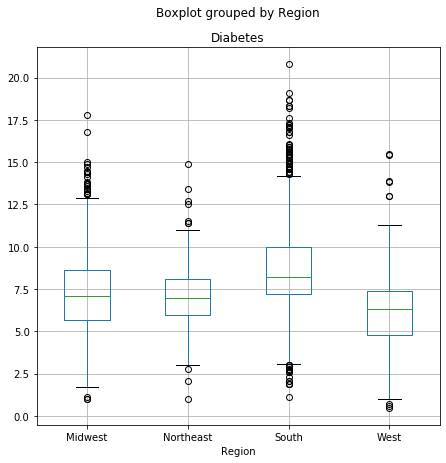

In [126]:
dfpcat_all.boxplot('Diabetes',by = 'Region',figsize = (7,7))

In [9]:
dfp.head()

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Uninsured,Diabetes
0,"Autauga, AL",10.4,27.800,78.60,24.500000,29.1,26.600000,11.70,14.2
1,"Baldwin, AL",10.2,27.200,76.20,23.600000,30.5,24.600000,12.18,7.2
2,"Barbour, AL",22.1,29.795,80.08,25.600000,31.6,17.700000,18.04,6.6
3,"Bibb, AL",16.8,29.795,86.60,26.897561,31.6,23.822917,15.41,13.1
4,"Blount, AL",11.9,33.500,74.60,24.200000,31.6,23.600000,14.59,8.4


In [10]:
dfpcat.head()

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Uninsured,Diabetes,Northeast,South,West
0,"Autauga, AL",10.4,27.800,78.60,24.500000,29.1,26.600000,11.70,14.2,0,1,0
1,"Baldwin, AL",10.2,27.200,76.20,23.600000,30.5,24.600000,12.18,7.2,0,1,0
2,"Barbour, AL",22.1,29.795,80.08,25.600000,31.6,17.700000,18.04,6.6,0,1,0
3,"Bibb, AL",16.8,29.795,86.60,26.897561,31.6,23.822917,15.41,13.1,0,1,0
4,"Blount, AL",11.9,33.500,74.60,24.200000,31.6,23.600000,14.59,8.4,0,1,0


## Base model

#### dfp - unweighted, Percentages as 10%

In [11]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker+Uninsured"
base_model = ols(formula= formula, data=dfp).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     190.9
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          6.60e-236
Time:                        03:59:19   Log-Likelihood:                -6850.8
No. Observations:                3113   AIC:                         1.372e+04
Df Residuals:                    3105   BIC:                         1.377e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2485      0.747      0.333      0.740      -1.217       1.714
Poverty             0.1195      0.015      8.176      0.000       0.091       0.148
No_Exercise         0.0494      0.010      5.079      0.000       0.030       0.068
Few_Fruit_Veg      -0.0144      0.010     -1.467      0.142      -0.034       0.005
Obesity             0.1547      0.012     13.264      0.000       0.132       0.178
High_Blood_Pres     0.1052      0.011      9.212      0.000       0.083       0.128
Smoker             -0.0142      0.009     -1.531      0.126      -0.032       0.004
Uninsured          -0.0275      0.013     -2.098      0.036      -0.053      -0.002
==============================================================================
Omnibus:                      382.185   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              931.854
Skew:                           0.704   Prob(JB):                    4.47e-203
Kurtosis:                       5.280   Cond. No.                     1.82e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### dfpcat - unweighted percentages with categorical variables

In [12]:
formula_cat = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker+Uninsured+Northeast+South+West"
cat_model = ols(formula= formula_cat, data=dfpcat).fit()
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     137.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          5.51e-239
Time:                        03:59:20   Log-Likelihood:                -6835.8
No. Observations:                3113   AIC:                         1.369e+04
Df Residuals:                    3102   BIC:                         1.376e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9988      0.797      1.252      0.210      -0.565       2.562
Poverty             0.1039      0.015      6.841      0.000       0.074       0.134
No_Exercise         0.0373      0.010      3.755      0.000       0.018       0.057
Few_Fruit_Veg      -0.0183      0.010     -1.773      0.076      -0.039       0.002
Obesity             0.1464      0.012     12.385      0.000       0.123       0.170
High_Blood_Pres     0.1049      0.012      9.019      0.000       0.082       0.128
Smoker             -0.0163      0.009     -1.765      0.078      -0.034       0.002
Uninsured       -2.606e-05      0.014     -0.002      0.999      -0.028       0.028
Northeast          -0.0240      0.173     -0.138      0.890      -0.364       0.316
South               0.0993      0.108      0.923      0.356      -0.112       0.310
West               -0.6901      0.149     -4.616      0.000      -0.983      -0.397
==============================================================================
Omnibus:                      374.179   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.976
Skew:                           0.688   Prob(JB):                    1.03e-200
Kurtosis:                       5.282   Cond. No.                     1.96e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# y = dfpcat['Diabetes']
# X = dfpcat[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Uninsured', 'Northeast','South','West']]


In [14]:
# base_model = LinearRegression()
# base_model.fit(X, y)

### Check for multicollinearity

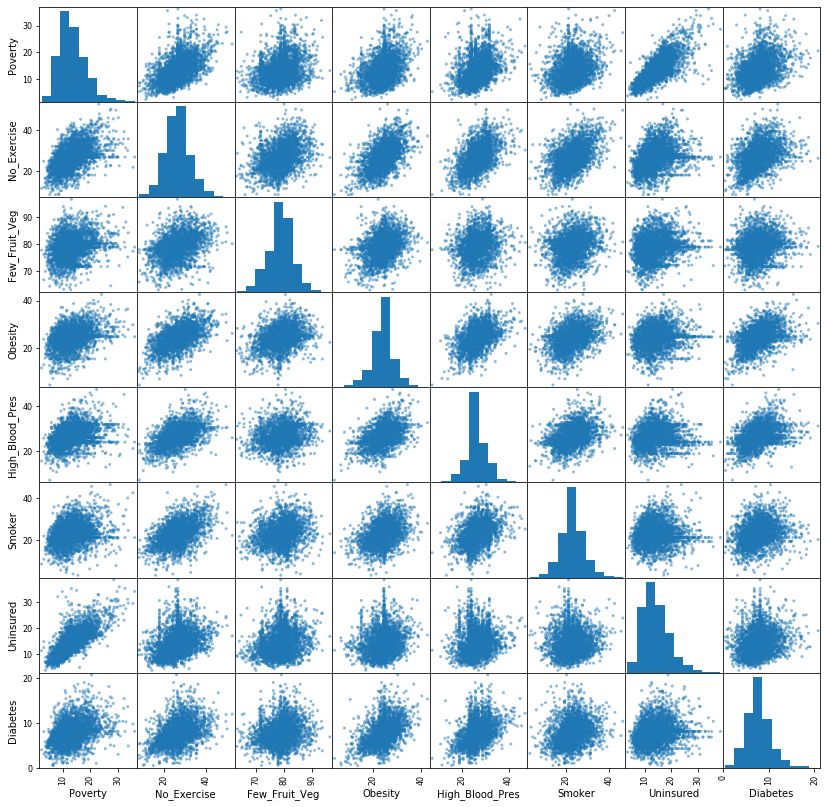

In [171]:
pd.plotting.scatter_matrix(dfp, figsize = [14,14])
plt.show()


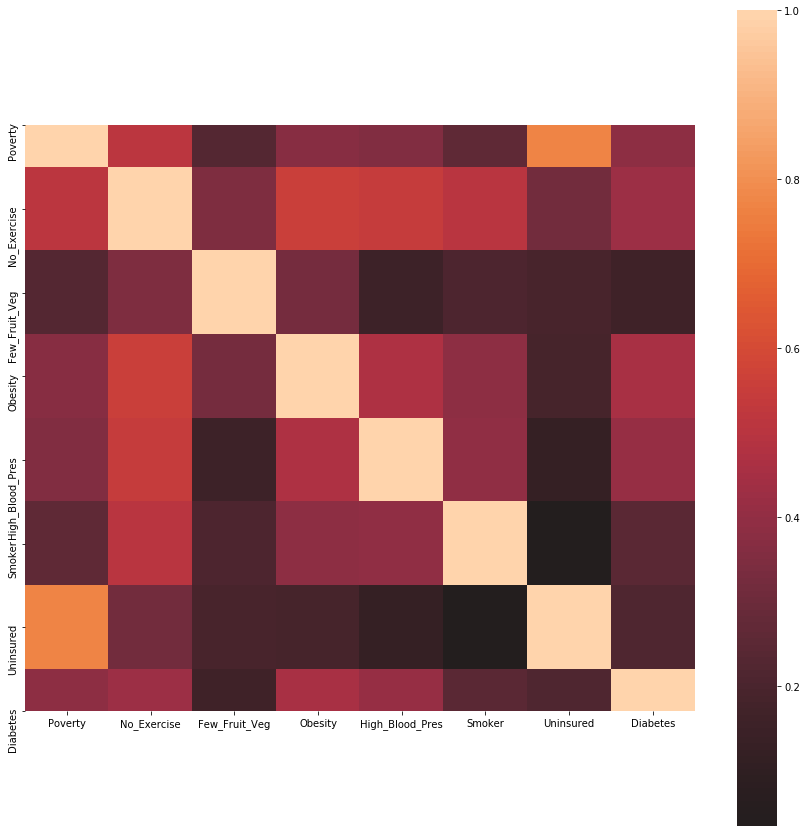

In [168]:
from matplotlib import pyplot

pyplot.figure(figsize=(15, 15))
sns.heatmap(dfp.corr(), center=0, square = True, annot_kws={'size': 15});

In [16]:
dfp.corr()

,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Uninsured,Diabetes
Poverty,1.000000,0.516195,0.231606,0.371871,0.352370,0.262683,0.768033,0.385256
No_Exercise,0.516195,1.000000,0.345143,0.558905,0.547140,0.500981,0.320041,0.427799
Few_Fruit_Veg,0.231606,0.345143,1.000000,0.325630,0.154049,0.205425,0.195786,0.160757
Obesity,0.371871,0.558905,0.325630,1.000000,0.470819,0.384349,0.182288,0.455367
High_Blood_Pres,0.352370,0.547140,0.154049,0.470819,1.000000,0.397341,0.122629,0.414492
Smoker,0.262683,0.500981,0.205425,0.384349,0.397341,1.000000,0.034869,0.248387
Uninsured,0.768033,0.320041,0.195786,0.182288,0.122629,0.034869,1.000000,0.217823
Diabetes,0.385256,0.427799,0.160757,0.455367,0.414492,0.248387,0.217823,1.000000


##### Uninsured and poverty are correlated so we will drop Uninsured (it also has a p-value of 0.999)

In [17]:
# Drop Uninsured from working dfs
dfp = dfp.drop('Uninsured', axis=1)
dfpcat = dfpcat.drop('Uninsured', axis=1)

In [18]:
# Reset the base models after removing Uninsured
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
base_model = ols(formula= formula, data=dfp).fit()
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     221.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          3.80e-236
Time:                        03:59:31   Log-Likelihood:                -6853.1
No. Observations:                3113   AIC:                         1.372e+04
Df Residuals:                    3106   BIC:                         1.376e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1026      0.745      0.138      0.890      -1.357       1.563
Poverty             0.0962      0.009     10.136      0.000       0.078       0.115
No_Exercise         0.0485      0.010      4.991      0.000       0.029       0.068
Few_Fruit_Veg      -0.0161      0.010     -1.649      0.099      -0.035       0.003
Obesity             0.1565      0.012     13.448      0.000       0.134       0.179
High_Blood_Pres     0.1088      0.011      9.638      0.000       0.087       0.131
Smoker             -0.0102      0.009     -1.128      0.259      -0.028       0.008
==============================================================================
Omnibus:                      389.683   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.004
Skew:                           0.716   Prob(JB):                    6.93e-208
Kurtosis:                       5.304   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
formula_cat = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker+Northeast+South+West"
cat_model = ols(formula= formula_cat, data=dfpcat).fit()
cat_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          4.33e-240
Time:                        03:59:31   Log-Likelihood:                -6835.8
No. Observations:                3113   AIC:                         1.369e+04
Df Residuals:                    3103   BIC:                         1.375e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9987      0.797      1.253      0.210      -0.564       2.561
Poverty             0.1039      0.011      9.864      0.000       0.083       0.125
No_Exercise         0.0373      0.010      3.778      0.000       0.018       0.057
Few_Fruit_Veg      -0.0183      0.010     -1.781      0.075      -0.038       0.002
Obesity             0.1464      0.012     12.388      0.000       0.123       0.170
High_Blood_Pres     0.1049      0.011      9.129      0.000       0.082       0.127
Smoker             -0.0163      0.009     -1.791      0.073      -0.034       0.002
Northeast          -0.0239      0.173     -0.139      0.890      -0.363       0.315
South               0.0993      0.107      0.924      0.355      -0.111       0.310
West               -0.6902      0.140     -4.928      0.000      -0.965      -0.416
==============================================================================
Omnibus:                      374.185   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.992
Skew:                           0.688   Prob(JB):                    1.02e-200
Kurtosis:                       5.282   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check if linear regression assumptions are met

In [49]:
# checking for Homoscedasticity
pred_val = cat_model.fittedvalues.copy()
true_val = dfpcat['Diabetes'].values.copy()
residual = true_val - pred_val

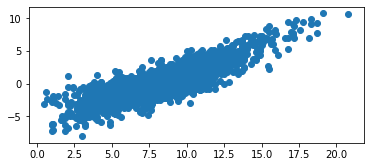

In [50]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(dfpcat['Diabetes'],residual)

In [51]:
# Residuals are not randomly distributed 

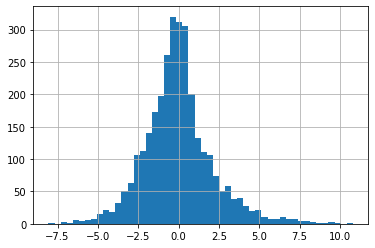

In [52]:
# Checking for normality 
residual.hist(bins=50)

0       38.623013
1        0.695070
2       10.345842
3       14.924263
4        0.086641
          ...    
3108     0.401506
3109     0.445531
3110     1.677506
3111     7.929723
3112     1.885198
Length: 3113, dtype: float64

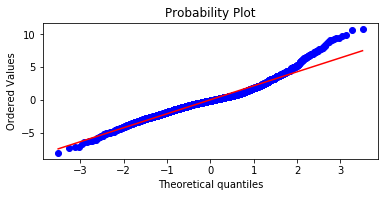

In [53]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
residual**2

In [40]:
# Residuals distribution is close to normal but deviates at the edges

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c19939cc0>,
      dtype=object)

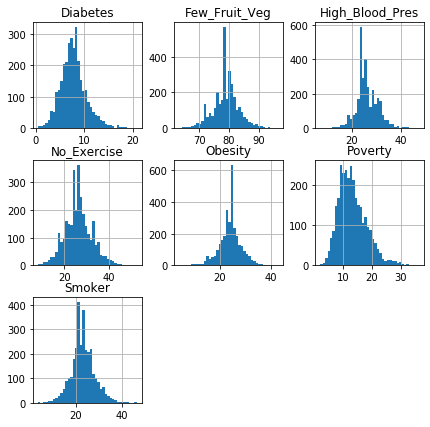

In [26]:
# Check independent variable distributions
dfp.hist(bins=40, figsize=[7,7])

#### Log transformations

We will create two datasets to compare whether log transforming only ceratin variables or all is better

In [96]:
dfpcat_log = dfpcat.copy(deep=True)

In [97]:
dfpcat_log_all = dfpcat.copy(deep=True)

In [98]:
all_log_list = ['Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity',
       'High_Blood_Pres', 'Smoker', 'Diabetes']
log_list = ['Poverty', 'Diabetes']

Poverty:0
Diabetes:0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20e0eac8>,
      dtype=object)

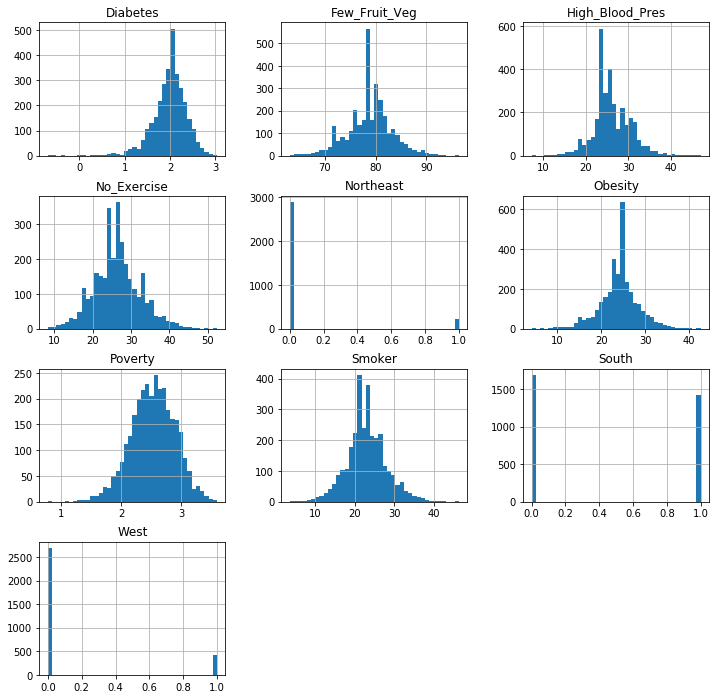

In [99]:
# Transform the variables to see how it affects the model
for col in log_list:
    print(f'{col}:{(dfpcat_log[col] == 0).sum()}')
    dfpcat_log[col] = np.log(dfpcat_log[col])
dfpcat_log.hist(bins=40, figsize=[12,12])

Poverty:0
No_Exercise:0
Few_Fruit_Veg:0
Obesity:0
High_Blood_Pres:0
Smoker:0
Diabetes:0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c20fca7b8>,
      dtype=object)

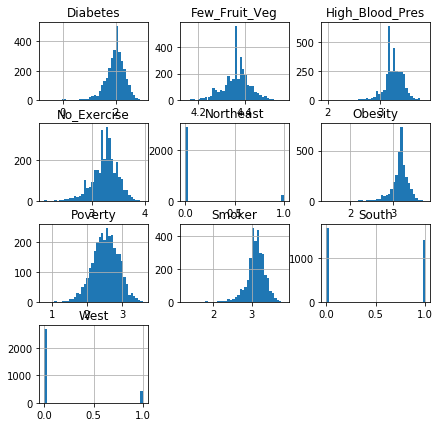

In [100]:
for col in all_log_list:
    print(f'{col}:{(dfpcat_log_all[col] == 0).sum()}')
    dfpcat_log_all[col] = np.log(dfpcat_log_all[col])
dfpcat_log_all.hist(bins=40, figsize=[7,7])

In [101]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker+Northeast+South+West"
cat_log_model = ols(formula= formula, data=dfpcat_log).fit()
cat_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     159.1
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          5.03e-248
Time:                        04:22:59   Log-Likelihood:                -757.19
No. Observations:                3113   AIC:                             1534.
Df Residuals:                    3103   BIC:                             1595.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.8174      0.113      7.206      0.000       0.595       1.040
Poverty             0.1926      0.020      9.573      0.000       0.153       0.232
No_Exercise         0.0041      0.001      2.938      0.003       0.001       0.007
Few_Fruit_Veg      -0.0042      0.001     -2.895      0.004      -0.007      -0.001
Obesity             0.0232      0.002     13.877      0.000       0.020       0.027
High_Blood_Pres     0.0151      0.002      9.279      0.000       0.012       0.018
Smoker             -0.0014      0.001     -1.063      0.288      -0.004       0.001
Northeast           0.0094      0.025      0.382      0.703      -0.039       0.057
South            7.535e-05      0.015      0.005      0.996      -0.030       0.030
West               -0.1221      0.020     -6.085      0.000      -0.161      -0.083
==============================================================================
Omnibus:                      827.764   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4161.516
Skew:                          -1.179   Prob(JB):                         0.00
Kurtosis:                       8.150   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker+Northeast+South+West"
cat_log_model_all = ols(formula= formula, data=dfpcat_log_all).fit()
cat_log_model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     169.8
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          3.94e-262
Time:                        04:22:59   Log-Likelihood:                -724.45
No. Observations:                3113   AIC:                             1469.
Df Residuals:                    3103   BIC:                             1529.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2969      0.480     -0.619      0.536      -1.238       0.644
Poverty             0.1775      0.020      8.876      0.000       0.138       0.217
No_Exercise         0.1355      0.035      3.877      0.000       0.067       0.204
Few_Fruit_Veg      -0.3403      0.113     -3.013      0.003      -0.562      -0.119
Obesity             0.5280      0.036     14.466      0.000       0.456       0.600
High_Blood_Pres     0.3975      0.042      9.485      0.000       0.315       0.480
Smoker             -0.0223      0.027     -0.839      0.402      -0.075       0.030
Northeast           0.0076      0.024      0.311      0.756      -0.040       0.055
South               0.0048      0.015      0.319      0.749      -0.025       0.034
West               -0.0963      0.020     -4.774      0.000      -0.136      -0.057
==============================================================================
Omnibus:                      792.877   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3966.797
Skew:                          -1.126   Prob(JB):                         0.00
Kurtosis:                       8.051   Cond. No.                         738.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log transforming all independent and dependent variables has the most effect on our model

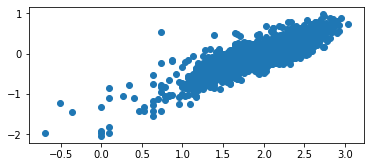

In [103]:
# checking for Homoscedasticity after performing log transformations
pred_val_log_all = cat_log_model_all.fittedvalues.copy()
true_val_log_all = dfpcat_log_all['Diabetes'].values.copy()
residual_log_all = true_val_log_all - pred_val_log_all

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(dfpcat_log_all['Diabetes'],residual_log_all)

0       38.623013
1        0.695070
2       10.345842
3       14.924263
4        0.086641
          ...    
3108     0.401506
3109     0.445531
3110     1.677506
3111     7.929723
3112     1.885198
Length: 3113, dtype: float64

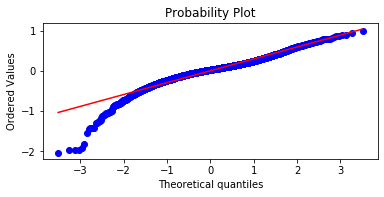

In [105]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual_log_all, plot=ax, fit=True)
residual**2

/Users/regi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


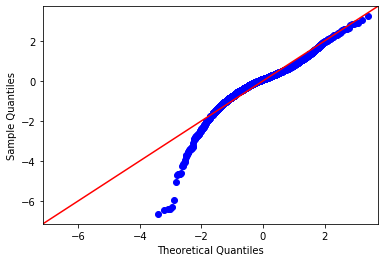

In [115]:
cat_log_model_all_residuals = cat_log_model_all.resid
fig = sm.graphics.qqplot(cat_log_model_all_residuals, dist=stats.norm, line='45', fit=True)
fig.show()

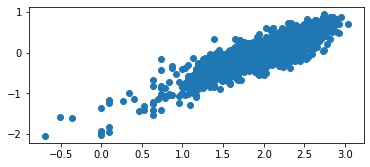

In [106]:
# checking for Homoscedasticity after performing log transformations
pred_val_log = cat_log_model.fittedvalues.copy()
true_val_log = dfpcat_log['Diabetes'].values.copy()
residual_log = true_val_log - pred_val_log

fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(dfpcat_log['Diabetes'],residual_log)

0       38.623013
1        0.695070
2       10.345842
3       14.924263
4        0.086641
          ...    
3108     0.401506
3109     0.445531
3110     1.677506
3111     7.929723
3112     1.885198
Length: 3113, dtype: float64

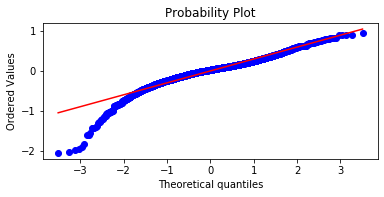

In [107]:
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual_log, plot=ax, fit=True)
residual**2

#### Perform a test split

In [35]:
y = dfpcat_log_all['Diabetes']
X = dfpcat_log_all[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 
                    'Smoker','Northeast','South','West']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [37]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2334 779 2334 779


In [38]:
# Compare Train MSE to Test MSE
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
# Calculate the Mean Squared Error (MSE)
train_mse = metrics.mean_squared_error(y_train, y_hat_train)
test_mse = metrics.mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Training r^2:', linreg.score(X_train, y_train))
print('Test Mean Squarred Error:', test_mse)
print('Test r^2:', linreg.score(X_test, y_test))

Train Mean Squarred Error: 0.09287425461942615
Training r^2: 0.3295105945027035
Test Mean Squarred Error: 0.09467157275913639
Test r^2: 0.3284239682613139


#### Perform a k-fold cross-validation

In [155]:
kfold = KFold(8, True)
b_model = LinearRegression()

In [173]:
cv_10_cv_r2 = cross_val_score(b_model, X, y, scoring='r2', cv=kfold)
print(f' R-squared of the model (mean of 10-fold cross-validation): {cv_10_cv_r2.mean()}')
baseline = cv_10_cv_r2.mean()
cv_10_cv_r2

 R-squared of the model (mean of 10-fold cross-validation): 0.3239074225081585


array([0.26004448, 0.32599528, 0.25084208, 0.38874033, 0.35884982,
       0.30917471, 0.32251511, 0.37509756])

In [157]:
cv_10_cv_mse = cross_val_score(b_model, X, y, scoring='neg_mean_squared_error', cv=kfold)
print(f' MSE of the model (mean of 10-fold cross-validation): {cv_10_cv_mse.mean()}')
cv_10_cv_mse

 MSE of the model (mean of 10-fold cross-validation): -0.09399084248995382


array([-0.10773883, -0.08208913, -0.10287754, -0.08654016, -0.09338282,
       -0.09621581, -0.08903182, -0.09405062])

### Check for interactions

In [111]:
dfpcat.columns

Index(['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity',
       'High_Blood_Pres', 'Smoker', 'Diabetes', 'Northeast', 'South', 'West'],
      dtype='object')

In [112]:
X_int = X.copy(deep=True)

In [175]:
X_int

,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Northeast,South,West,interaction
0,2.341806,3.325036,4.364372,3.198673,3.370738,3.280911,0,1,0,0
1,2.322388,3.303217,4.333361,3.161247,3.417727,3.202746,0,1,0,0
2,3.095578,3.394341,4.383026,3.242592,3.453157,2.873565,0,1,0,0
3,2.821379,3.394341,4.461300,3.292036,3.453157,3.170648,0,1,0,0
4,2.476538,3.511545,4.312141,3.186353,3.453157,3.161247,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
3108,2.151762,3.086487,4.390739,3.161247,3.122365,3.310543,0,0,1,0
3109,1.722767,2.261763,4.231204,2.197225,2.939162,2.617396,0,0,1,0
3110,2.360854,3.152736,4.420045,3.122365,3.113515,3.072693,0,0,1,0
3111,2.406945,3.144152,4.357990,3.049273,3.325036,2.980619,0,0,1,0


In [113]:
from itertools import combinations
combinations = list(combinations(X_int.columns.values, 2))

interactions = []
for comb in combinations:
    X_int['interaction'] = X_int[comb[0]] * X_int[comb[1]]
    score = np.mean(cross_val_score(b_model, X_int, y, scoring='r2', cv=kfold))
    if score > baseline:
        interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

Top 7 interactions: [('No_Exercise', 'High_Blood_Pres', 0.329)]


In [176]:
X_nonlog

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Uninsured,Diabetes
0,"Autauga, AL",10.4,27.800,78.60,24.500000,29.1,26.600000,11.70,14.2
1,"Baldwin, AL",10.2,27.200,76.20,23.600000,30.5,24.600000,12.18,7.2
2,"Barbour, AL",22.1,29.795,80.08,25.600000,31.6,17.700000,18.04,6.6
3,"Bibb, AL",16.8,29.795,86.60,26.897561,31.6,23.822917,15.41,13.1
4,"Blount, AL",11.9,33.500,74.60,24.200000,31.6,23.600000,14.59,8.4
...,...,...,...,...,...,...,...,...,...
3108,"Sweetwater, WY",8.6,21.900,80.70,23.600000,22.7,27.400000,14.42,5.3
3109,"Teton, WY",5.6,9.600,68.80,9.000000,18.9,13.700000,9.70,2.4
3110,"Uinta, WY",10.6,23.400,83.10,22.700000,22.5,21.600000,15.08,4.8
3111,"Washakie, WY",11.1,23.200,78.10,21.100000,27.8,19.700000,14.85,9.4


In [172]:
X_nonlog = dfp.copy(deep=True)

In [174]:
from itertools import combinations
combinations = list(combinations(X_nonlog.columns.values, 2))

interactions = []
for comb in combinations:
    X_int['interaction'] = X_nonlog[comb[0]] * X_nonlog[comb[1]]
    score = np.mean(cross_val_score(b_model, X_nonlog, y, scoring='r2', cv=kfold))
    if score > baseline:
        interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

TypeError: can't multiply sequence by non-int of type 'float'

In [118]:
#  # Perform t`est train split
# X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

Unpenalized Linear Regression Coefficients are:[ 0.18245802  0.14361685 -0.42000361  0.54581308  0.37433901 -0.03123802
  0.01244771  0.01373603 -0.09596322]
Unpenalized Linear Regression Intercept:0.059102197923212696


In [120]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

Lasso Regression Coefficients are:[ 0.  0.  0.  0.  0.  0. -0.  0. -0.]
Lasso Linear Regression Intercept:1.9946697622934635


In [121]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

Ridge Regression Coefficients are:[ 0.18162289  0.14311248 -0.38247239  0.54084667  0.37177947 -0.03032952
  0.01467325  0.01500192 -0.09509858]
Ridge Linear Regression Intercept:-0.08061175403772536


In [127]:
# create predictions
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(2334,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(779,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [134]:
list(y_train)

[2.0149030205422647,
 1.7404661748405046,
 1.9600947840472698,
 2.096967245595576,
 1.9740810260220096,
 1.9740810260220096,
 1.840549633397487,
 2.2617630984737906,
 1.7749523509116738,
 1.8870696490323797,
 1.7749523509116738,
 2.066862759472976,
 2.128231705849268,
 2.468099531471619,
 2.042502174893194,
 2.1162555148025524,
 2.0918640616783932,
 1.5260563034950492,
 2.2192034840549946,
 2.1162555148025524,
 2.1972245773362196,
 1.9315214116032138,
 2.0121541478119127,
 2.0910852021118993,
 2.341805806147327,
 2.151762203259462,
 1.454731522673119,
 2.096967245595576,
 2.096967245595576,
 2.028148247292285,
 1.8934465795195725,
 1.9315214116032138,
 1.8082887711792655,
 2.1588721739615537,
 1.667706820558076,
 1.916922612182061,
 2.501435951739211,
 2.151762203259462,
 1.8870696490323797,
 2.2300144001592104,
 1.9600947840472698,
 2.174751721484161,
 2.096967245595576,
 1.8934465795195725,
 1.667706820558076,
 2.0121541478119127,
 2.151762203259462,
 2.3608540011180215,
 2.397895272

In [136]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((list(y_train) - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((list(y_test) - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

Train Error Ridge Model 216.77764743169246
Test Error Ridge Model 73.70716544276989


Train Error Lasso Model 754579.7127433087
Test Error Lasso Model 85703.07467114161


Train Error Unpenalized Linear Model 216.76851028174065
Test Error Unpenalized Linear Model 73.74915517936725


In [137]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [139]:
stepwise_selection(X, y, verbose=True)

/Users/regi/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/regi/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/Users/regi/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  Obesity                        with p-value 9.39411e-184
Add  High_Blood_Pres                with p-value 6.79109e-52
Add  Poverty                        with p-value 1.80781e-27
Add  West                           with p-value 3.54417e-10
Add  No_Exercise                    with p-value 0.000988837
Add  Few_Fruit_Veg                  with p-value 0.000909124


['Obesity',
 'High_Blood_Pres',
 'Poverty',
 'West',
 'No_Exercise',
 'Few_Fruit_Veg']

In [140]:

X_select = dfpcat_log_all[[ 'Obesity', 'High_Blood_Pres', 'Poverty', 'West', 'No_Exercise', 'Few_Fruit_Veg']]

In [158]:
cv_10_cv_r2_select = cross_val_score(b_model, X_select, y, scoring='r2', cv=kfold)
print(f' R-squared of the model (mean of 10-fold cross-validation): {cv_10_cv_r2_select.mean()}')
baseline_select = cv_10_cv_r2_select.mean()
cv_10_cv_r2_select

 R-squared of the model (mean of 10-fold cross-validation): 0.3270225943653544


array([0.26691455, 0.33501345, 0.32721527, 0.34034077, 0.3632611 ,
       0.24251397, 0.36446451, 0.37645714])

In [159]:
cv_10_cv_mse_select = cross_val_score(b_model, X_select, y, scoring='neg_mean_squared_error', cv=kfold)
print(f' MSE of the model (mean of 10-fold cross-validation): {cv_10_cv_mse_select.mean()}')
cv_10_cv_mse_select

 MSE of the model (mean of 10-fold cross-validation): -0.09397105302712544


array([-0.08485616, -0.07670992, -0.09843847, -0.07832728, -0.09959705,
       -0.10683331, -0.11365243, -0.0933538 ])

In [187]:
formula_cat

'Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+West'

In [189]:
formula_obes = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres"
cat_model_select = ols(formula= formula_obes, data=dfpcat_log_all).fit()
cat_model_select.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     297.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          1.70e-260
Time:                        09:42:52   Log-Likelihood:                -739.38
No. Observations:                3113   AIC:                             1491.
Df Residuals:                    3107   BIC:                             1527.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.6501      0.453     -1.434      0.152      -1.539       0.239
Poverty             0.1537      0.018      8.649      0.000       0.119       0.189
No_Exercise         0.1764      0.033      5.309      0.000       0.111       0.242
Few_Fruit_Veg      -0.3250      0.107     -3.031      0.002      -0.535      -0.115
Obesity             0.5590      0.036     15.678      0.000       0.489       0.629
High_Blood_Pres     0.4087      0.041     10.009      0.000       0.329       0.489
==============================================================================
Omnibus:                      767.809   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3790.435
Skew:                          -1.092   Prob(JB):                         0.00
Kurtosis:                       7.945   Cond. No.                         642.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
cat_model_select = ols(formula= formula_cat, data=dfpcat_log_all).fit()
cat_model_select.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     254.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          1.64e-265
Time:                        09:43:08   Log-Likelihood:                -724.87
No. Observations:                3113   AIC:                             1464.
Df Residuals:                    3106   BIC:                             1506.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2698      0.457     -0.591      0.555      -1.165       0.626
Poverty             0.1791      0.018      9.782      0.000       0.143       0.215
No_Exercise         0.1306      0.034      3.826      0.000       0.064       0.198
Few_Fruit_Veg      -0.3549      0.107     -3.320      0.001      -0.564      -0.145
Obesity             0.5238      0.036     14.517      0.000       0.453       0.595
High_Blood_Pres     0.3961      0.041      9.727      0.000       0.316       0.476
West               -0.0973      0.018     -5.395      0.000      -0.133      -0.062
==============================================================================
Omnibus:                      792.061   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3963.958
Skew:                          -1.125   Prob(JB):                         0.00
Kurtosis:                       8.050   Cond. No.                         649.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""